In [22]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Let's start with the classic classifier example of iris data. You will first need to install the "scikit-learn" library into your version of Python. Then you can import the iris data with following code:

In [23]:
from sklearn import datasets
iris = datasets.load_iris()

In [24]:
# print iris.data[:, 1] # Second column
# print iris.target # seems built in
# print iris.feature_names  # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

### Now use the following code to plot the petal length and sepal width of the three types of flowers. 

In [25]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
iris.feature_names[3]

'petal width (cm)'

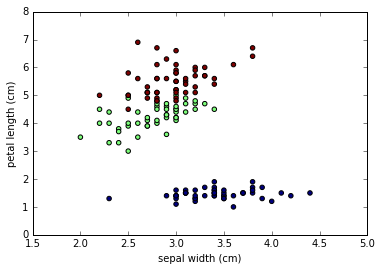

In [28]:
import matplotlib.pyplot as plt
plt.scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])

A support vector machine tries to draw boundaries between the various classes (in this case, flowers, distinguished by color) that maximizes the distance between the points and the margin boundary or buffer between the classes. In the plot from above, it seems pretty obvious how to draw a line that would separate one set of flowers (setosa) from the rest. However, it may not be clear how to, say, separate the two flower types (virginica, versicolor) from each other.

Let us simplify the example a little and choose only two of the flowers. 

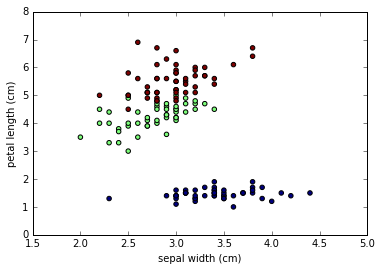

In [29]:
plt.scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target)
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

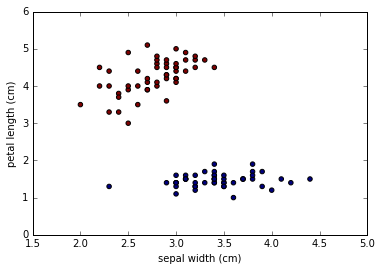

In [30]:
#The first 100 observations correspond to setosa and versicolor
plt.scatter(iris.data[0:100, 1], iris.data[0:100, 2], c=iris.target[0:100])
plt.xlabel(iris.feature_names[1])
plt.ylabel(iris.feature_names[2])
plt.show()

With these two type of flowers, we can see a clear separation given the two fields we have available. We can then simply apply the Support Vector Classification (SVC) module:

In [31]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
X = iris.data[0:100, 1:3] 
y = iris.target[0:100] # MZ: the classes
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In order to visualize the results, we have to add a few elements to the above graphs. 

In [32]:
#Adapted from https://github.com/jakevdp/sklearn_scipy2013
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

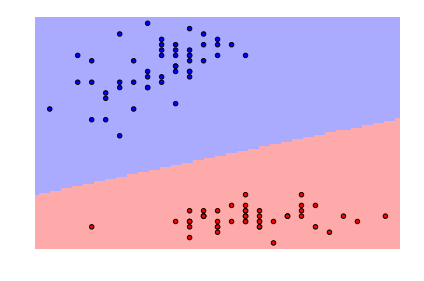

In [33]:
def plot_estimator(estimator, X, y):
    estimator.fit(X, y)
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.axis('tight')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_estimator(svc, X, y)

The graph (above) draws the boundary determined by the SVM and shades in the entire area delineated by this boundary. In the case of the two flowers selected, the boundary is clean and there are no misclassifications. 

If we repeat the above procedures (the SVM calculation) for the versicolor and virginica flowers, we will see the boundary drawn fails to correctly classify some cases of flowers. This is because the types of flowers do not necessary have a clean linear boundary in the two dimensions we have chosen. 

The drawing of boundaries can be subject to overfitting, or being overly sensitive to a handful of influential observations. To deal with this, SVMs are usually calculated with soft margins or boundaries. In Python code, the size of the boundary is expressed as the parameter "C" as in:

In [34]:
svc = svm.SVC(kernel='linear', C=1)

The default value for C is 1, and increasing values widen this margin, effectively increasing the bias of the classification.

# Unit 4: Lesson 6: Project 2: SVM and Iris Data

#### Estimated time: 1 hour

## Challenge

* Run SVMs along with the visualization from the Overview for all the combinations of fields (there are four) for each combination of flower types (there are three). Are there clear boundaries between the flower types based on the various combinations of fields? Is there a particular combination that separates a flower type cleanly? Is there a particular combination that separates the flower types almost cleanly?

In [45]:
X = iris.data[0:100, [0,2]]

In [49]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [69]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

setosa & versicolor | sepal length (cm) vs sepal width (cm) :


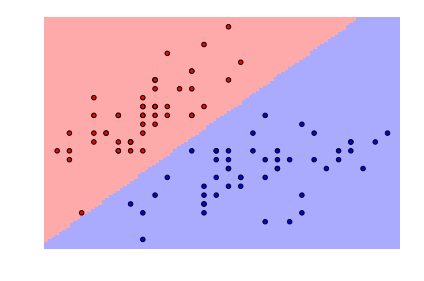

setosa & versicolor | sepal length (cm) vs petal length (cm) :


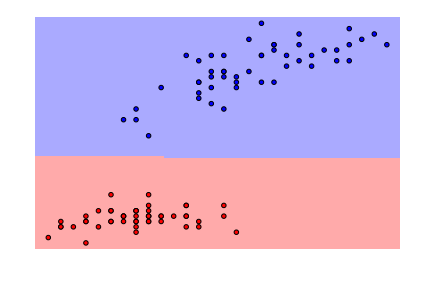

setosa & versicolor | sepal length (cm) vs petal width (cm) :


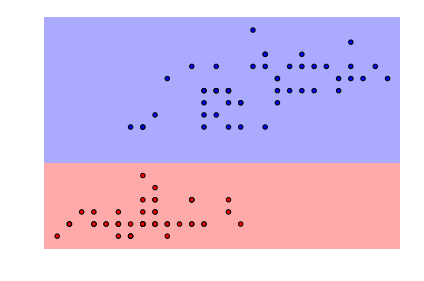

setosa & versicolor | sepal width (cm) vs petal length (cm) :


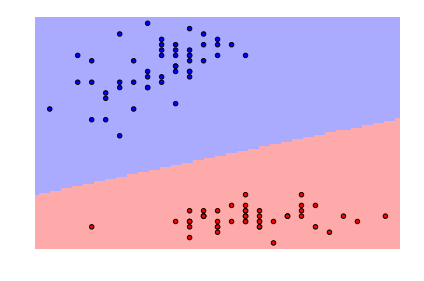

setosa & versicolor | sepal width (cm) vs petal width (cm) :


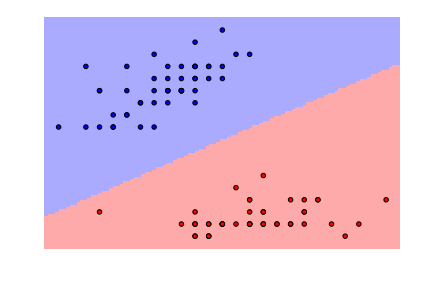

setosa & versicolor | petal length (cm) vs petal width (cm) :


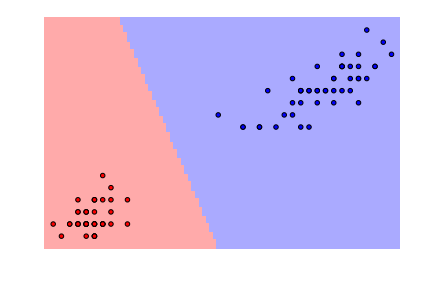

setosa & virginica | sepal length (cm) vs sepal width (cm) :


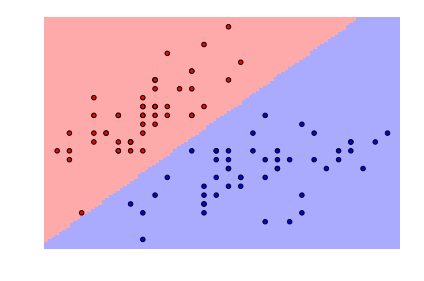

setosa & virginica | sepal length (cm) vs petal length (cm) :


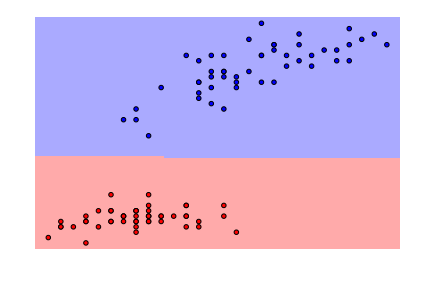

setosa & virginica | sepal length (cm) vs petal width (cm) :


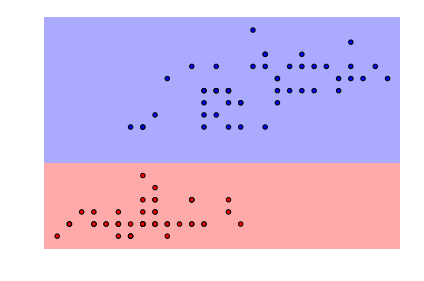

setosa & virginica | sepal width (cm) vs petal length (cm) :


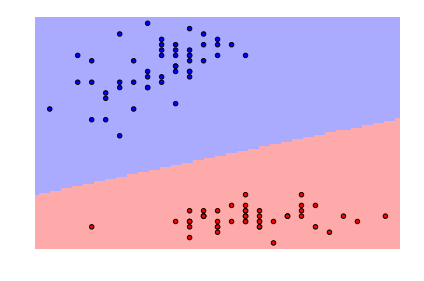

setosa & virginica | sepal width (cm) vs petal width (cm) :


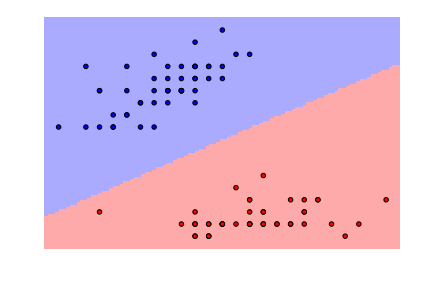

setosa & virginica | petal length (cm) vs petal width (cm) :


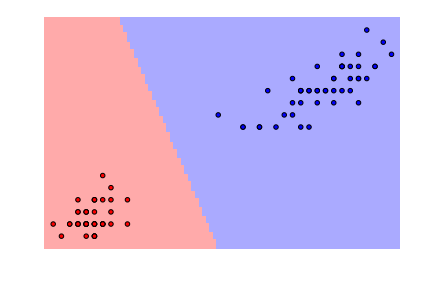

versicolor & virginica | sepal length (cm) vs sepal width (cm) :


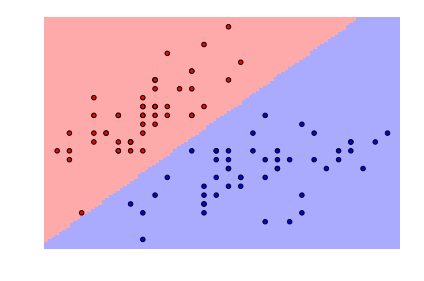

versicolor & virginica | sepal length (cm) vs petal length (cm) :


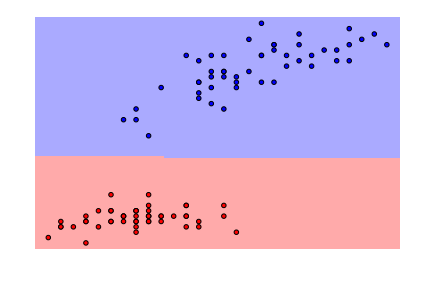

versicolor & virginica | sepal length (cm) vs petal width (cm) :


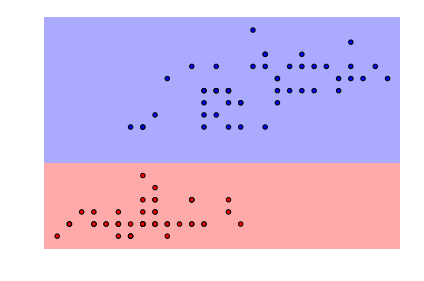

versicolor & virginica | sepal width (cm) vs petal length (cm) :


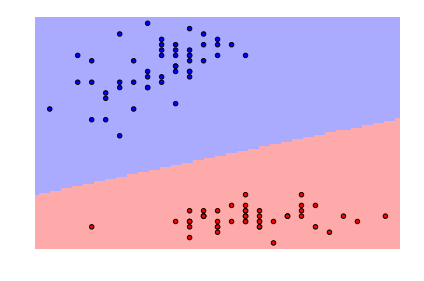

versicolor & virginica | sepal width (cm) vs petal width (cm) :


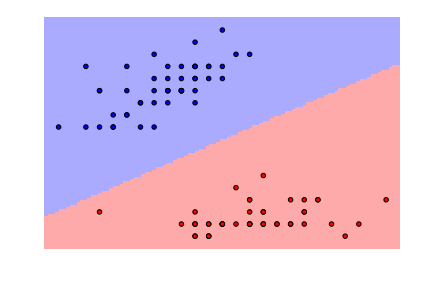

versicolor & virginica | petal length (cm) vs petal width (cm) :


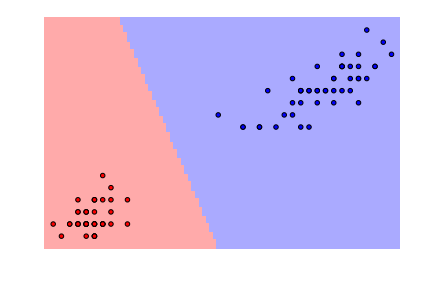

In [73]:
# y = iris.target[0:100] # MZ: the classes

for y in [iris.target[0:100], np.array(list(iris.target[0:50]) + list(iris.target[100:])), iris.target[50:]]:
    for comb in [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]:
        a, b = comb
        f1, f2 = iris.target_names[y[0]], iris.target_names[y[-1]]
        print(f1, '&', f2, '|', iris.feature_names[a], 'vs', iris.feature_names[b], ':')
        X = iris.data[0:100, [a,b]] 
        plot_estimator(svc, X, y)
    

* Run SVM code for classifying three flowers at a time. How is the code different?

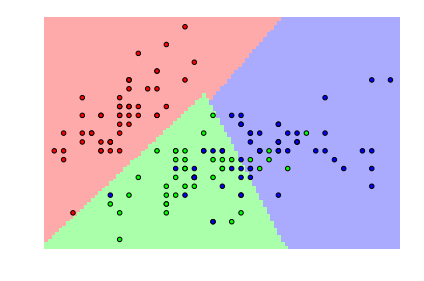

In [74]:
X = iris.data[0:150, [0,1]]
y = iris.target[0:150]

plot_estimator(svc, X, y)

Is the code different? Or is it only a matter of changing the parameters?

* Try adjusting the code for a wider soft margin. Focus on classifying flowers without clean boundaries. How does a wider margin help? Is there a point where the margin becomes too wide? Too narrow?

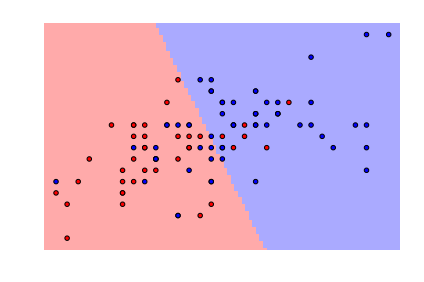

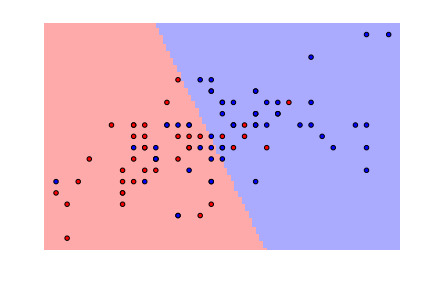

In [77]:
# versicolor vs virginica [50:]
svc = svm.SVC(kernel='linear', C=1)

X = iris.data[50:, [0,1]]
y = iris.target[50:]

plot_estimator(svc, X, y)


svc = svm.SVC(kernel='linear', C=2)
X = iris.data[50:, [0,1]]
y = iris.target[50:]

plot_estimator(svc, X, y)